In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf'''
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import matplotlib.pyplot as plt
# 폰트 설정
#plt.rc('font', family='NanumGothic')


# 데이터 불러오기

In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/holidays_events.csv'
holidays_events = pd.read_csv(data_path)
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/oil.csv'
oil = pd.read_csv(data_path)
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/sample_submission.csv'
sample_submission = pd.read_csv(data_path)
sample_submission.head()

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0


In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/stores.csv'
stores = pd.read_csv(data_path)
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/test.csv'
test = pd.read_csv(data_path)
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/train.csv'
train = pd.read_csv(data_path)
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
# 데이터 경로 지정 및 읽어오기
data_path = '/content/drive/MyDrive/project3/transactions.csv'
transactions = pd.read_csv(data_path)
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
# 기본 정보
print('#'*20, '기본 정보', '#'*20)
oil.info() # info() 안에서 자동으로 print를 진행

# 기초 통계량
summary_statistics = oil.describe(include='all')
print('#'*20, '기초 통계량', '#'*20)
print(summary_statistics)

#################### 기본 정보 ####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
#################### 기초 통계량 ####################
              date   dcoilwtico
count         1218  1175.000000
unique        1218          NaN
top     2013-01-01          NaN
freq             1          NaN
mean           NaN    67.714366
std            NaN    25.630476
min            NaN    26.190000
25%            NaN    46.405000
50%            NaN    53.190000
75%            NaN    95.660000
max            NaN   110.620000


In [ ]:
train = pd.merge(train, stores, how='left', on='store_nbr')
train = pd.merge(train, transactions, how='left', on=['date', 'store_nbr'])
train = pd.merge(train, oil, how='left', on='date')
train = pd.merge(train, holidays_events, how='left', on='date')
train = train.rename(columns = {"type_x" : "store_type", "type_y" : "holiday_type"})

test = pd.merge(test, stores, how='left', on='store_nbr')
test = pd.merge(test, transactions, how='left', on=['date', 'store_nbr'])
test = pd.merge(test, oil, how='left', on='date')
test = pd.merge(test, holidays_events, how='left', on='date')

In [ ]:
train.head()


,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   store_type    object 
 9   cluster       int64  
 10  transactions  float64
 11  dcoilwtico    float64
 12  holiday_type  object 
 13  locale        object 
 14  locale_name   object 
 15  description   object 
 16  transferred   object 
dtypes: float64(3), int64(4), object(10)
memory usage: 396.1+ MB


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
store_type            0
cluster               0
transactions     249117
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [ ]:
train['date'] = pd.to_datetime(train['date'])
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['week'] = train['date'].dt.isocalendar().week
train['quarter'] = train['date'].dt.quarter
train['day_of_week'] = train['date'].dt.day_name()

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday


## 평균 알아보기

In [ ]:
import plotly.graph_objects as go
import seaborn as sns

# 데이터 설정
train_holiday_type = train.groupby('holiday_type').agg({"sales": "mean"}).reset_index().sort_values(by='sales', ascending=False)
train_family = train.groupby('family').agg({"sales": "mean"}).reset_index().sort_values(by='sales', ascending=False)[:20]
train_cluster = train.groupby('cluster').agg({"sales": "mean"}).reset_index().sort_values(by='sales', ascending=False)
train_state = train.groupby('state').agg({"sales": "mean"}).reset_index().sort_values(by='sales', ascending=False)
train_city = train.groupby('city').agg({"sales": "mean"}).reset_index().sort_values(by='sales', ascending=False)
train_store_type = train.groupby('store_type').agg({"sales": "mean"}).reset_index().sort_values(by='sales', ascending=False)

# 색상 팔레트 설정
palette = sns.color_palette("husl", n_colors=len(train_holiday_type))

# 상품별 평균 매출 그래프
fig_family = go.Figure(go.Bar(x=train_family['sales'], y=train_family['family'], marker=dict(color=palette), orientation='h'))
fig_family.update_layout(title="상품별 평균 매출", xaxis_title="Average Sales", yaxis_title="Family", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

# 휴일 유형별 평균 매출 그래프
fig_holiday_type = go.Figure(go.Pie(values=train_holiday_type['sales'], labels=train_holiday_type['holiday_type'], hole=0.4, hoverinfo='label+percent+value', textinfo='label', marker=dict(colors=palette)))
fig_holiday_type.update_layout(title="휴일별 평균 매출", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

# 매장별 평균 매출 그래프
fig_store_type = go.Figure(go.Pie(values=train_store_type['sales'], labels=train_store_type['store_type'], hole=0.4, hoverinfo='label+percent+value', textinfo='label', marker=dict(colors=palette)))
fig_store_type.update_layout(title="매장별 평균 매출", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

# 지역별 평균 매출 그래프
fig_state = go.Figure(go.Pie(values=train_state['sales'], labels=train_state['state'], hole=0.4, hoverinfo='label+percent+value', textinfo='label', marker=dict(colors=palette)))
fig_state.update_layout(title="지역별 평균 매출", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

# 클러스터별 평균 매출 그래프
fig_cluster = go.Figure(go.Pie(values=train_cluster['sales'], labels=train_cluster['cluster'], hole=0.4, hoverinfo='label+percent+value', textinfo='label', marker=dict(colors=palette)))
fig_cluster.update_layout(title="cluster별 평균 매출", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

# 도시별 평균 매출 그래프
fig_city = go.Figure(go.Bar(x=train_city['city'], y=train_city['sales'], marker=dict(color=palette)))
fig_city.update_layout(title="도시별 평균 매출", xaxis_title="Average Sales", yaxis_title="City", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

# 출력
fig_family.show()
fig_holiday_type.show()
fig_store_type.show()
fig_state.show()
fig_cluster.show()
fig_city.show()



In [ ]:
import plotly.express as px
# store_type의 수
store_type_count = train['store_type'].value_counts().reset_index()
store_type_count.columns = ['store_type', 'count']

# cluster의 수
cluster_count = train['cluster'].value_counts().reset_index()
cluster_count.columns = ['cluster', 'count']

# state의 수
state_count = train['state'].value_counts().reset_index()
state_count.columns = ['state', 'count']

# city의 수
city_count = train['city'].value_counts().reset_index()
city_count.columns = ['city', 'count']


fig_store_type = px.bar(store_type_count, x='store_type', y='count', title='Number of Stores by Store Type',
                        labels={'store_type': 'Store Type', 'count': 'Count'})
fig_store_type.update_layout(xaxis_title="", yaxis_title="Count", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

fig_cluster = px.bar(cluster_count, x='cluster', y='count', title='Number of Stores by Cluster',
                      labels={'cluster': 'Cluster', 'count': 'Count'})
fig_cluster.update_layout(xaxis_title="", yaxis_title="Count", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

fig_state = px.bar(state_count, x='state', y='count', title='Number of Stores by State',
                    labels={'state': 'State', 'count': 'Count'})
fig_state.update_layout(xaxis_title="", yaxis_title="Count", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

fig_city = px.bar(city_count, x='city', y='count', title='Number of Stores by City',
                   labels={'city': 'City', 'count': 'Count'})
fig_city.update_layout(xaxis_title="", yaxis_title="Count", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))

fig_store_type.show()
fig_cluster.show()
fig_state.show()
fig_city.show()


지역에 따른 매장수

In [ ]:
import plotly.express as px

# state별 store_type의 수 계산
state_store_type_count = train.groupby(['state', 'store_type']).size().reset_index(name='count')

# 시각화
fig = px.bar(state_store_type_count, x='state', y='count', color='store_type',
             title='Number of Store Types by State', barmode='group')
fig.update_layout(xaxis_title="State", yaxis_title="Count", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))
fig.show()


매장 타입별 차이가 있을 줄 알았지만 위의 그래프로 어떤 기준으로 store_type을 나눈지 잘 모르겠음

In [ ]:

# cluster별 store_type의 수 계산
cluster_store_type_count = train.groupby(['cluster', 'store_type']).size().reset_index(name='count')

# 시각화
fig = px.bar(cluster_store_type_count, x='cluster', y='count', color='store_type',
             title='Number of Store Types by Cluster', barmode='group')
fig.update_layout(xaxis_title="Cluster", yaxis_title="Count", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))
fig.show()


-> cluster가 grouping of similar stores라서 store_type의 기준을 알 수 있을 줄 알았는데 잘 모르겠음


=> store_type의수는 D>C>A>B>E 순인데 평균 매출은 A>D>B>E>C 순

In [ ]:

# year별 평균 sales 계산
train['year'] = pd.to_datetime(train['date']).dt.year
yearly_sales = train.groupby('year')['sales'].mean().reset_index()

# 시각화
fig = px.bar(yearly_sales, x='year', y='sales', title='Average Sales by Year',
             labels={'year': 'Year', 'sales': 'Average Sales'})
fig.update_layout(xaxis_title="", yaxis_title="Average Sales", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))
fig.show()


In [ ]:

# year별 dcoilwtico 값 계산
yearly_dcoilwtico = train.groupby(train['date'].dt.year)['dcoilwtico'].mean().reset_index()

# 시각화
fig = px.bar(yearly_dcoilwtico, x='date', y='dcoilwtico', title='Average dcoilwtico by Year',
             labels={'date': 'Year', 'dcoilwtico': 'Average dcoilwtico'})
fig.update_layout(xaxis_title="Year", yaxis_title="Average dcoilwtico", plot_bgcolor='white', paper_bgcolor='white', font=dict(color='black'))
fig.show()


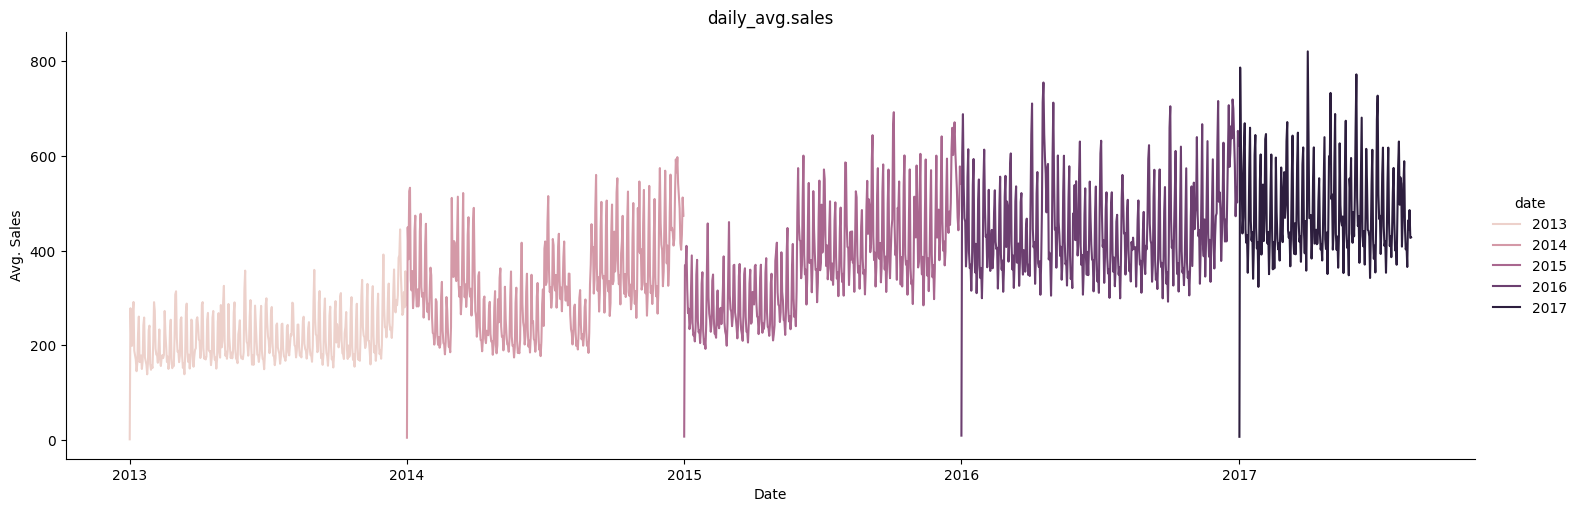

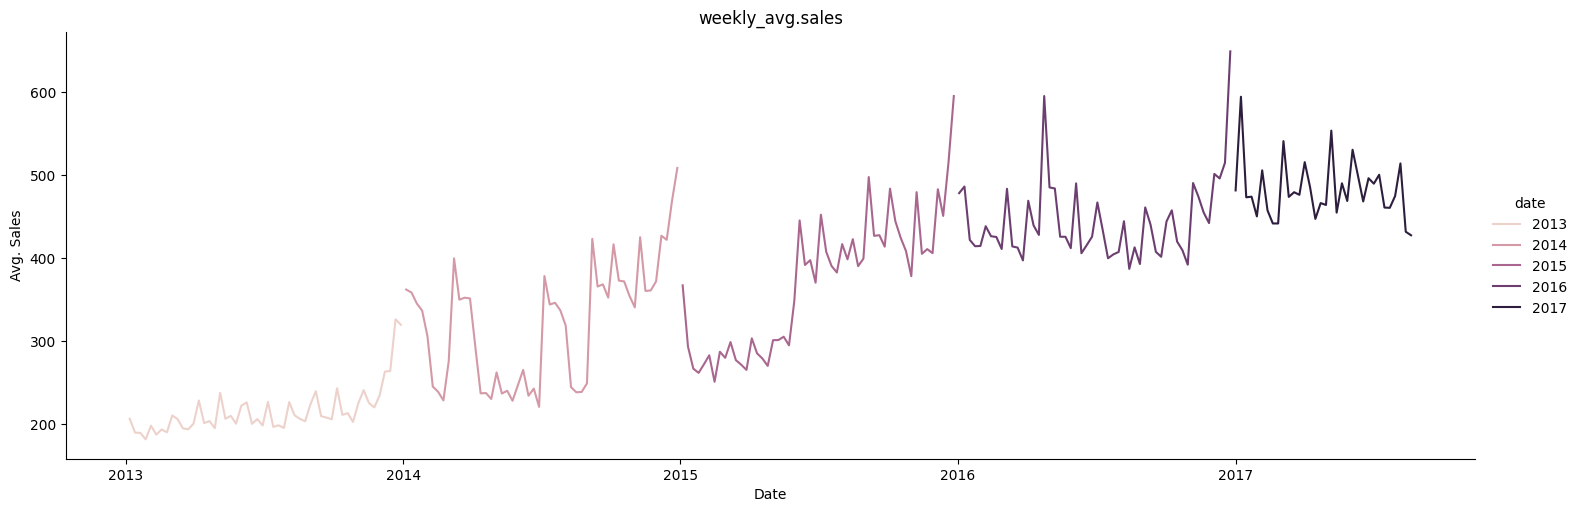

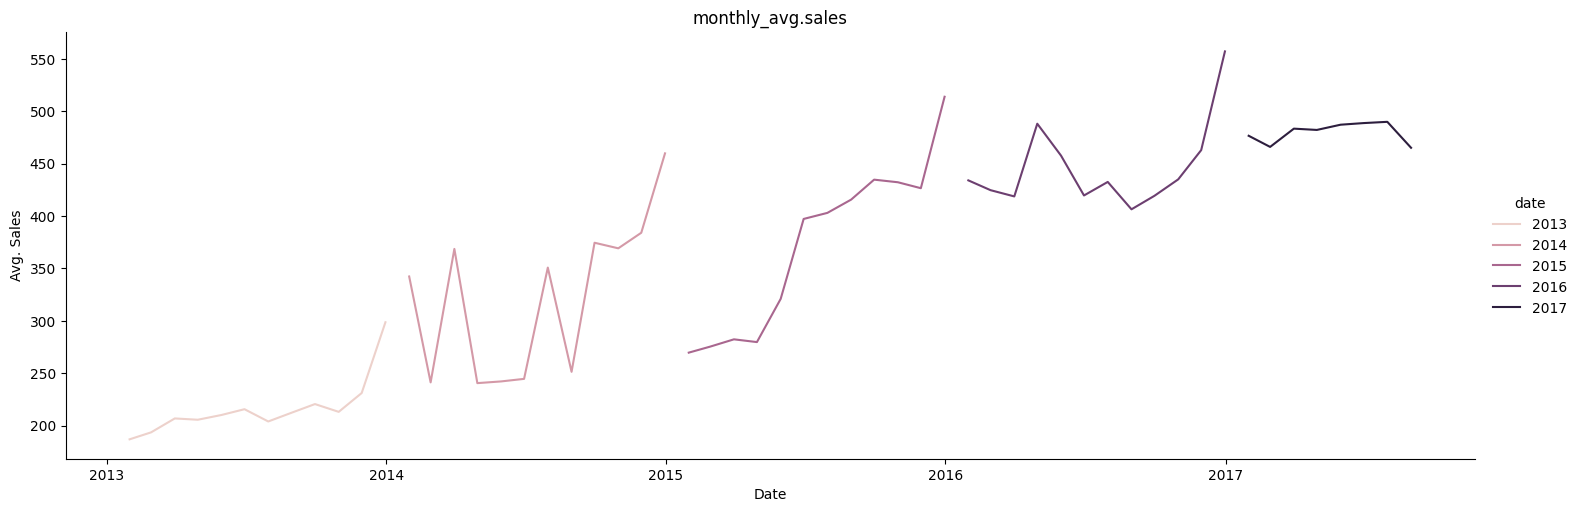

In [ ]:

train_eda = train.copy() ## Initializing a copy of train dataset for EDA purpose,
##                          and to preserve the original train dataset

train_eda=train_eda.set_index('date') ## Setting date to index for simple handling

daily_sales=train_eda.resample('D').sales.mean().to_frame()  ## Resample sales by day
weekly_sales=train_eda.resample('W').sales.mean().to_frame()  ## Resample sales by week
monthly_sales=train_eda.resample('M').sales.mean().to_frame()  ## Resample sales by month

df=[daily_sales,weekly_sales,monthly_sales]
titles=['daily_avg.sales','weekly_avg.sales','monthly_avg.sales']

for i,j in zip(df,titles):

    sns.relplot(x=i.index,y=i.sales,kind='line',aspect=3,hue=i.index.year)
    plt.xlabel('Date')
    plt.ylabel('Avg. Sales')
    plt.title(j)

plt.show()

<ipython-input-23-32625599c648>:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




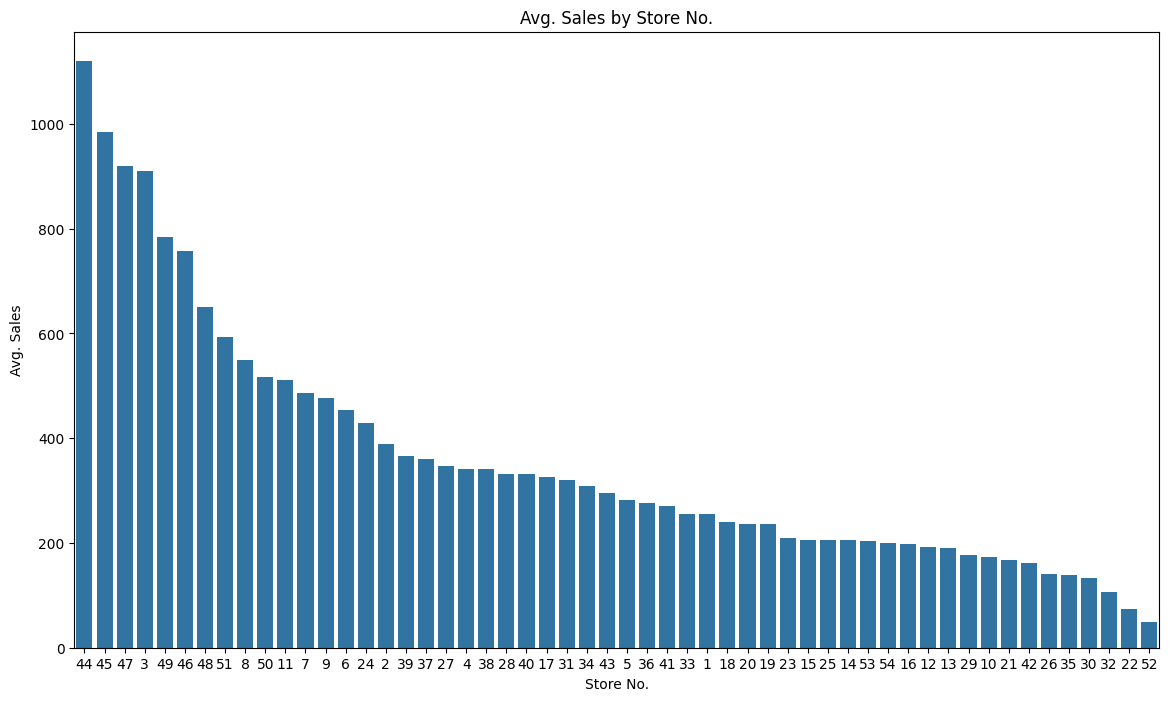

The best stores No. sell are:  [44, 45, 47, 3, 49]

The worst stores No. sell are:  [35, 30, 32, 22, 52]


In [ ]:
temp=train_eda.groupby('store_nbr')['sales'].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,8))
sns.barplot(data=temp,x=temp.index,y=temp.sales,ci=None,order=list(temp.index))
plt.xlabel('Store No.')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales by Store No.')
plt.show()

print('The best stores No. sell are: ',list(temp.index[:5]))
print('\nThe worst stores No. sell are: ',list(temp.index[-5:]))

휴일과 평일 sales 비교
평일과 모든 공휴일의 sales를 비교

In [ ]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,...,holiday_type,locale,locale_name,description,transferred,year,month,week,quarter,day_of_week
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Primer dia del ano,False,2013,1,1,1,Tuesday


In [ ]:
train_eda.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3054348 entries, 2013-01-01 to 2017-08-15
Data columns (total 21 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   city          object 
 6   state         object 
 7   store_type    object 
 8   cluster       int64  
 9   transactions  float64
 10  dcoilwtico    float64
 11  holiday_type  object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  transferred   object 
 16  year          int32  
 17  month         int32  
 18  week          UInt32 
 19  quarter       int32  
 20  day_of_week   object 
dtypes: UInt32(1), float64(3), int32(3), int64(4), object(10)
memory usage: 469.0+ MB


In [ ]:
## Merging and Mapping:
holidays_events=holidays_events[['date','type']] ## Keep date & holiday type for merging
#train_eda=pd.merge(left=train_eda, right=holidays_events, on='date', how='left')
train_eda.rename({'holiday_type':'holidays'},axis=1,inplace=True)
train_eda['holidays']=train_eda.holidays.map({'Holiday':1,'Additional':1,'Event':1,
                                                  'Bridge':1,'Transfer':1}).fillna(0).astype('int8')

## Adding weekends to holiday as well
#train_eda.set_index('date',inplace=True)
train_eda['day_of_week']=train_eda.index.dayofweek.astype('int8')
train_eda.loc[(train_eda['day_of_week']==5) | (train_eda['day_of_week']==6), 'holidays']=1

## Removing he first day of a year from holidays as mentioned before Favorita is closed these days.
train_eda['day_of_year']=train_eda.index.dayofyear.astype('int16')
train_eda.loc[train_eda['day_of_year']==1 ,'holidays']=0

train_eda.head()

,id,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,transactions,...,locale_name,description,transferred,year,month,week,quarter,day_of_week,is_holiday,day_of_year
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0.0,1
2013-01-01,1,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0.0,1
2013-01-01,2,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0.0,1
2013-01-01,3,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0.0,1
2013-01-01,4,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,...,Ecuador,Primer dia del ano,False,2013,1,1,1,1,0.0,1


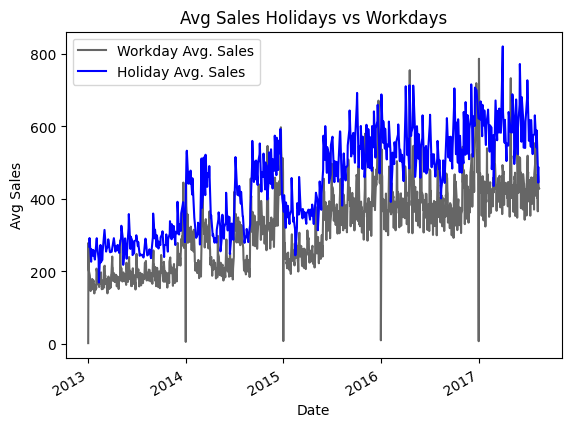

In [ ]:
avg_sales_holiday=train_eda[train_eda.holidays==1].groupby('date')['sales'].mean() ## Grouping by holidays
avg_sales_workday=train_eda[train_eda.holidays==0].groupby('date')['sales'].mean() ## Grouping by workdays

_=avg_sales_workday.plot(color='0.4',style='-', legend=True, label='Workday Avg. Sales')
_=avg_sales_holiday.plot(color='blue',style='-', legend=True, label='Holiday Avg. Sales')
plt.xlabel('Date')
plt.ylabel('Avg Sales')
plt.title('Avg Sales Holidays vs Workdays')

plt.show()

In [ ]:
## Merging and Mapping:
holidays_events=holidays_events[['date','type']] ## Keep date & holiday type for merging
train_eda=pd.merge(left=train_eda, right=holidays_events, on='date', how='left')
train_eda.rename({'type':'is_holiday'},axis=1,inplace=True)
train_eda['is_holiday']=train_eda.is_holiday.map({'Holiday':1,'Additional':1,'Event':1,
                                                  'Bridge':1,'Transfer':1}).fillna(0).astype('int8')

## Adding weekends to holiday as well
train_eda.set_index('date',inplace=True)
train_eda['day_of_week']=train_eda.index.dayofweek.astype('int8')
train_eda.loc[(train_eda['day_of_week']==5) | (train_eda['day_of_week']==6), 'is_holiday']=1

## Removing he first day of a year from holidays as mentioned before Favorita is closed these days.
train_eda['day_of_year']=train_eda.index.dayofyear.astype('int16')
train_eda.loc[train_eda['day_of_year']==1 ,'is_holiday']=0

train_eda.head()


In [ ]:
avg_sales_holiday=train_eda[train_eda.is_holiday==1].groupby('date')['sales'].mean() ## Grouping by holidays
avg_sales_workday=train_eda[train_eda.is_holiday==0].groupby('date')['sales'].mean() ## Grouping by workdays

_=avg_sales_workday.plot(color='0.4',style='.', legend=True, label='Workday Avg. Sales')
_=avg_sales_holiday.plot(color='red',style='.', legend=True, label='Holiday Avg. Sales')
plt.xlabel('Date')
plt.ylabel('Avg. Sales')
plt.title('Avg. Sales on Holidays vs. Workdays')

plt.show()